<a href="https://colab.research.google.com/github/mehedi37/DSP_LAB/blob/main/DSP_lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# X1 and X2

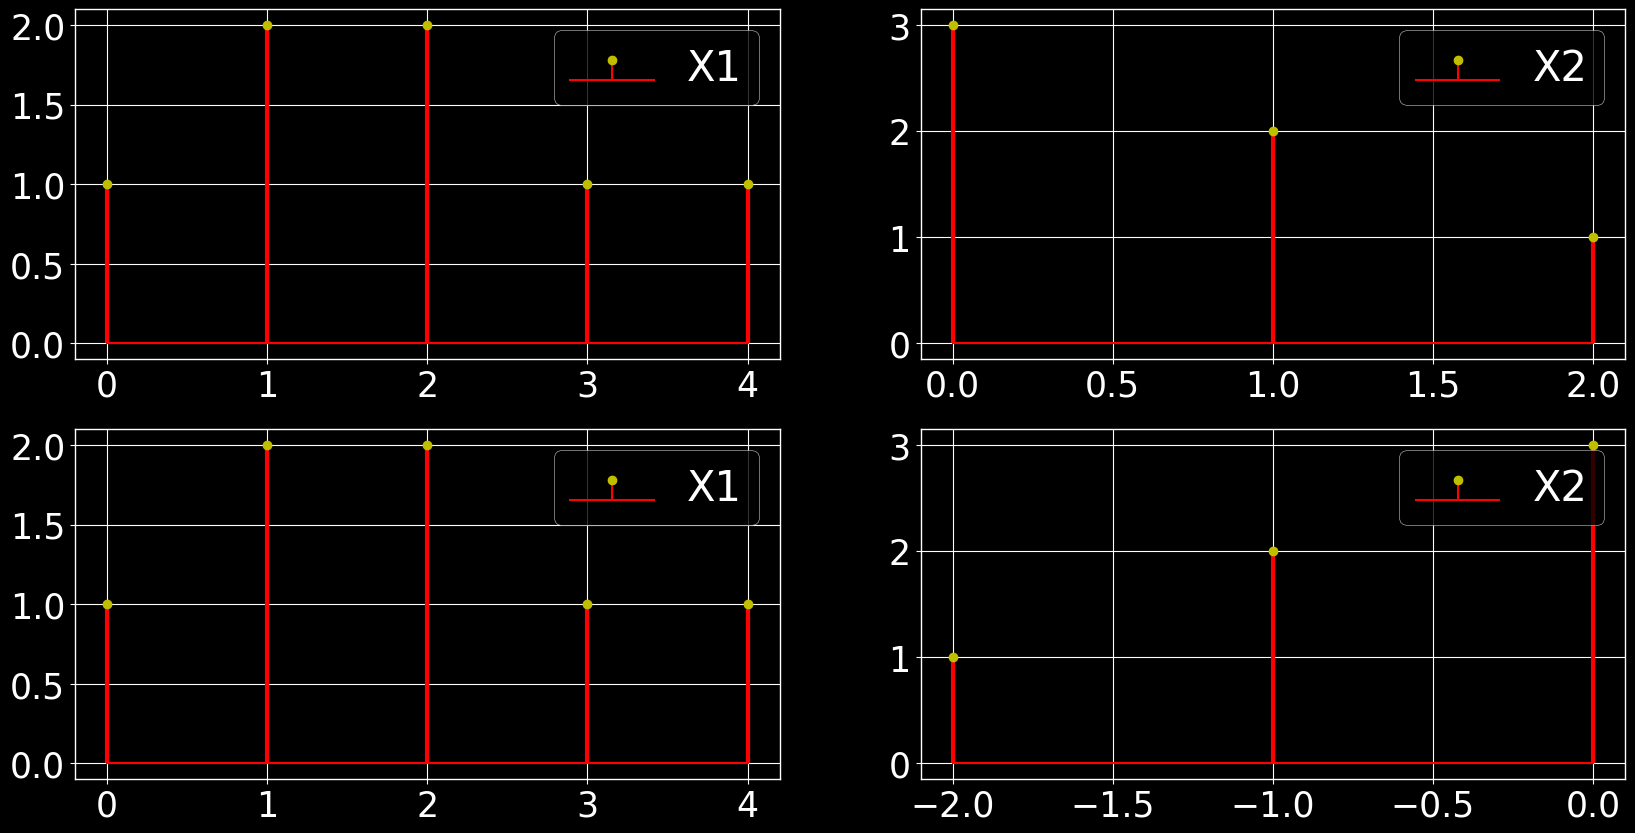

In [73]:
def plot_stem(n, x, subplot_position, label):
    plt.subplot(2, 2, subplot_position)
    markerline, stemlines, baseline = plt.stem(n, x, label=label,  linefmt='r-', markerfmt='yo', basefmt='r-')
    plt.setp(stemlines, 'linewidth', 3)
    plt.legend(loc='upper right', fontsize=30)

# Data
x1 = np.array([1, 2, 2, 1, 1])
n1 = np.array([0, 1, 2, 3, 4])
x2 = np.array([3, 2, 1])
n2 = np.array([0, 1, 2])
f_x2 = np.flip(x2)
n3 = np.array([-2, -1, 0])

# Plotting
plt.figure(figsize=(20, 10))
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25

plot_stem(n1, x1, 1, 'X1')
plot_stem(n2, x2, 2, 'X2')
plot_stem(n1, x1, 3, 'X1')
plot_stem(n3, f_x2, 4, 'X2')

plt.show()

# Plotting Convulation

[]

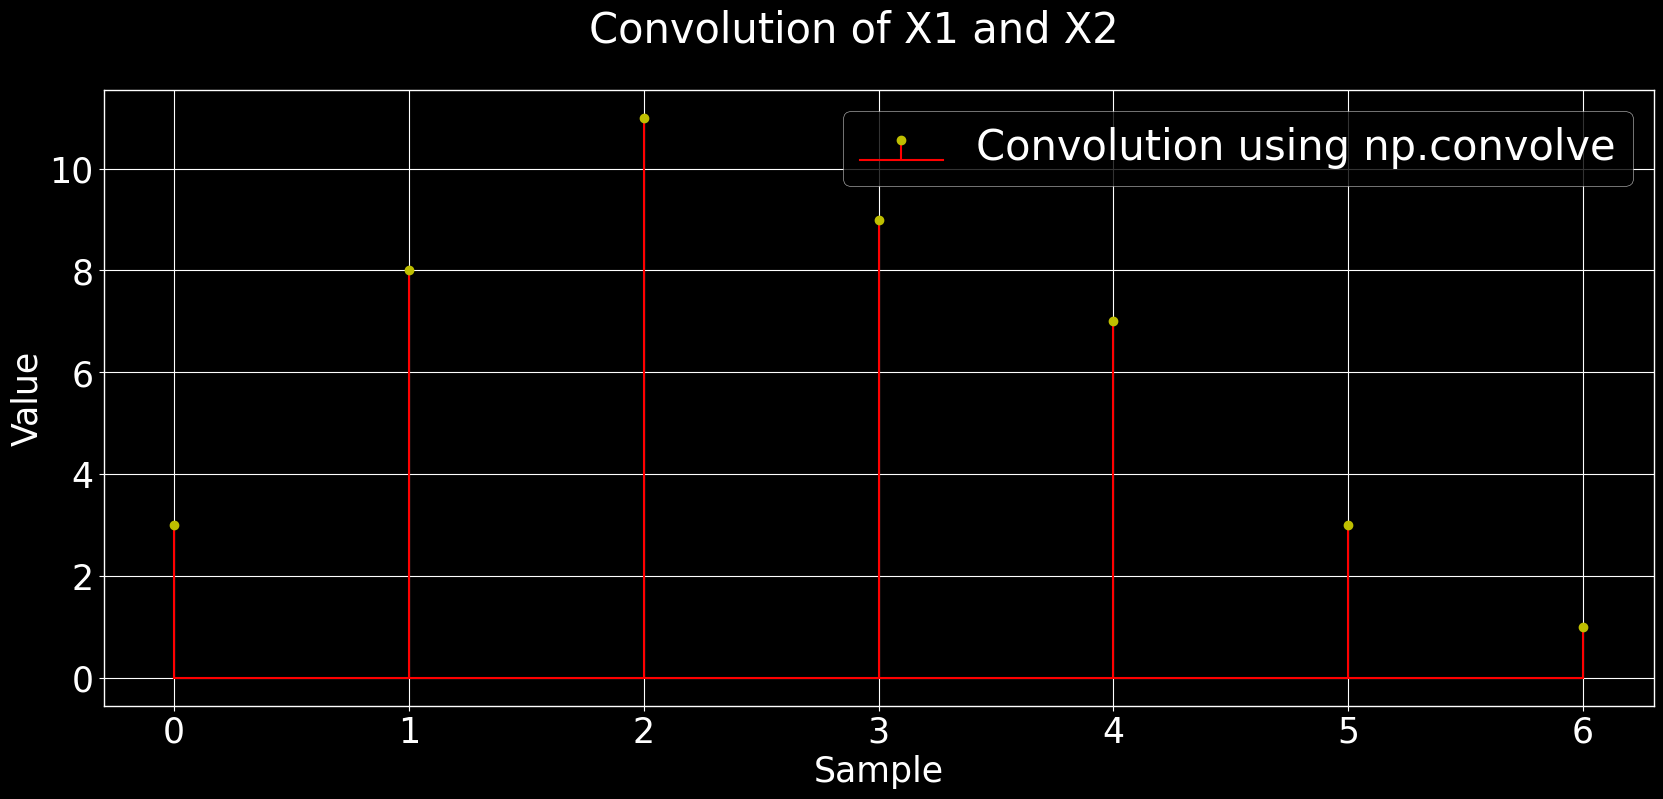

In [74]:
plt.figure(figsize=(20, 8))
plt.suptitle('Convolution of X1 and X2', fontsize=30)
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.stem(np.convolve(x1, x2, mode = 'full'), label='Convolution using np.convolve', linefmt='r-', markerfmt='yo', basefmt='r-')
plt.xlabel('Sample', fontsize=25)
plt.ylabel('Value', fontsize=25)
plt.legend(loc='upper right', fontsize=30)

plt.plot()

## 🔖 TODO: without `np.flip()` flip the signal

# Application of Convolution denoising

In [75]:
srate = 256 # Hz
t = np.arange(0, 3, 1/srate)
pnts = len(t)

print('Length of time vector:', pnts)
print('Time vector:', t)
# print('Sampling rate:', srate)

Length of time vector: 768
Time vector: [0.         0.00390625 0.0078125  0.01171875 0.015625   0.01953125
 0.0234375  0.02734375 0.03125    0.03515625 0.0390625  0.04296875
 0.046875   0.05078125 0.0546875  0.05859375 0.0625     0.06640625
 0.0703125  0.07421875 0.078125   0.08203125 0.0859375  0.08984375
 0.09375    0.09765625 0.1015625  0.10546875 0.109375   0.11328125
 0.1171875  0.12109375 0.125      0.12890625 0.1328125  0.13671875
 0.140625   0.14453125 0.1484375  0.15234375 0.15625    0.16015625
 0.1640625  0.16796875 0.171875   0.17578125 0.1796875  0.18359375
 0.1875     0.19140625 0.1953125  0.19921875 0.203125   0.20703125
 0.2109375  0.21484375 0.21875    0.22265625 0.2265625  0.23046875
 0.234375   0.23828125 0.2421875  0.24609375 0.25       0.25390625
 0.2578125  0.26171875 0.265625   0.26953125 0.2734375  0.27734375
 0.28125    0.28515625 0.2890625  0.29296875 0.296875   0.30078125
 0.3046875  0.30859375 0.3125     0.31640625 0.3203125  0.32421875
 0.328125   0.33203125

### Adding noise to the signal

In [76]:
# creating a noiseless signal
x = np.sin(2*np.pi*2*t)

# creating a random noise signal
noise = 5*np.random.randn(pnts)

# adding noise to the signal
Noisysignal = x + noise

### Plotting noiseless and noisy signal

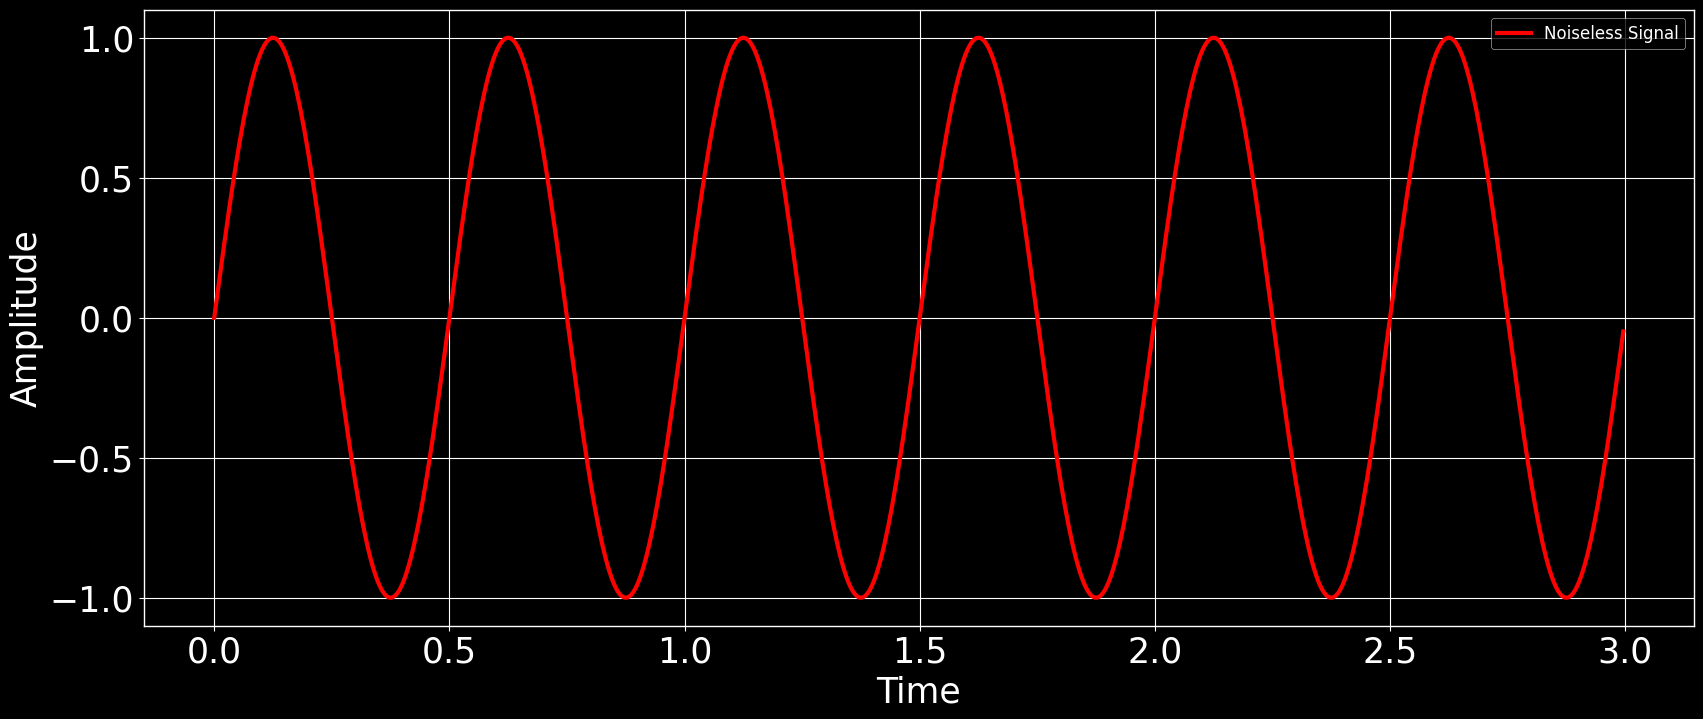

In [77]:
# Plotting sinuosoidal signal
plt.figure(figsize=(20, 8))
plt.plot(t, x, label='Noiseless Signal', linewidth=3, color='r')
plt.xlabel('Time', fontsize=25)
plt.ylabel('Amplitude', fontsize=25)
plt.legend(loc='upper right', fontsize=12)
plt.show()

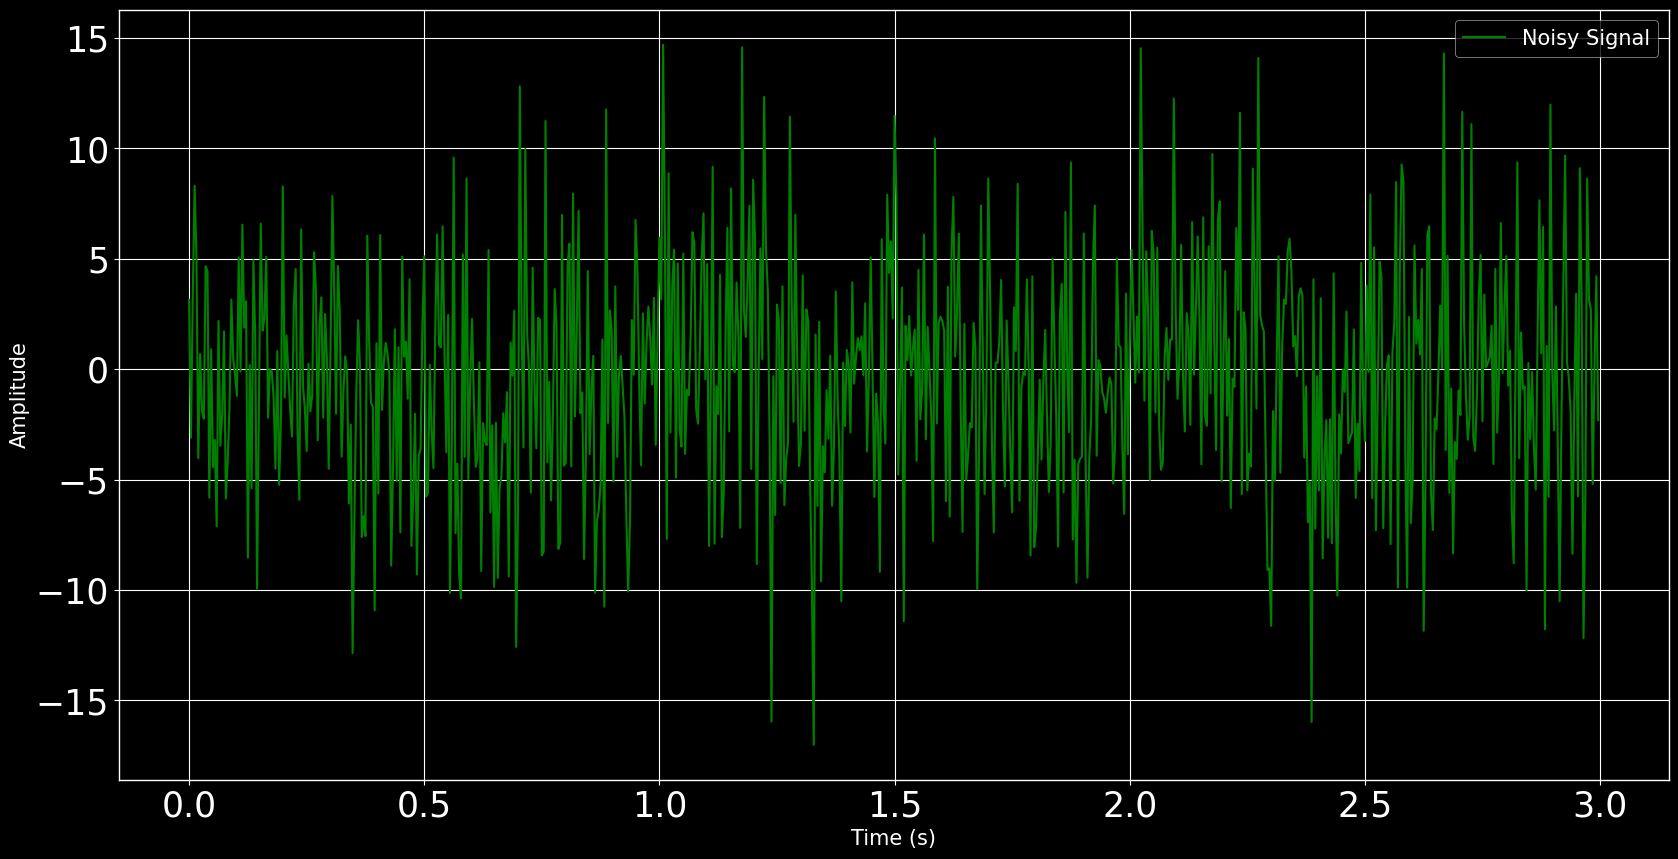

In [78]:
#Plotting noisy signal

plt.figure(figsize=(20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.plot(t, Noisysignal, label = 'Noisy Signal', color = 'g')
plt.xlabel('Time (s)', fontsize = 15)
plt.ylabel('Amplitude', fontsize = 15)
plt.legend(fontsize = 15)

plt.show()

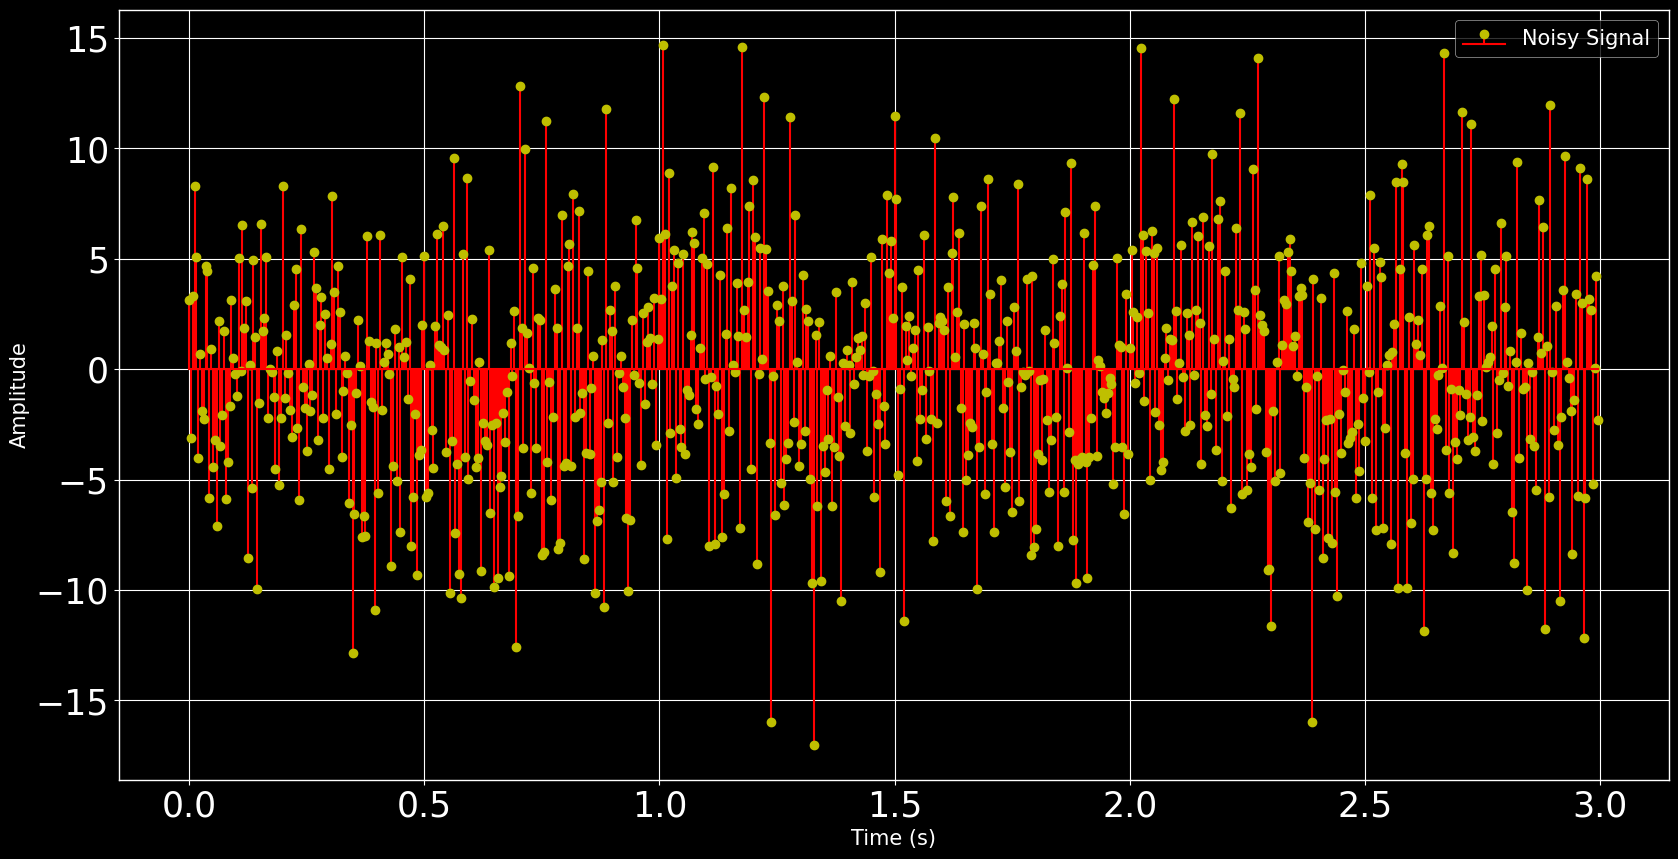

In [79]:
# Steming the noisy signal
plt.figure(figsize=(20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.stem(t, Noisysignal, label = 'Noisy Signal', linefmt='r-', markerfmt='yo', basefmt='r-')
plt.xlabel('Time (s)', fontsize = 15)
plt.ylabel('Amplitude', fontsize = 15)
plt.legend(fontsize = 15)

plt.show()

### Denoising the signal

In [80]:
filter = 2*np.ones(50)/10
filter

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])

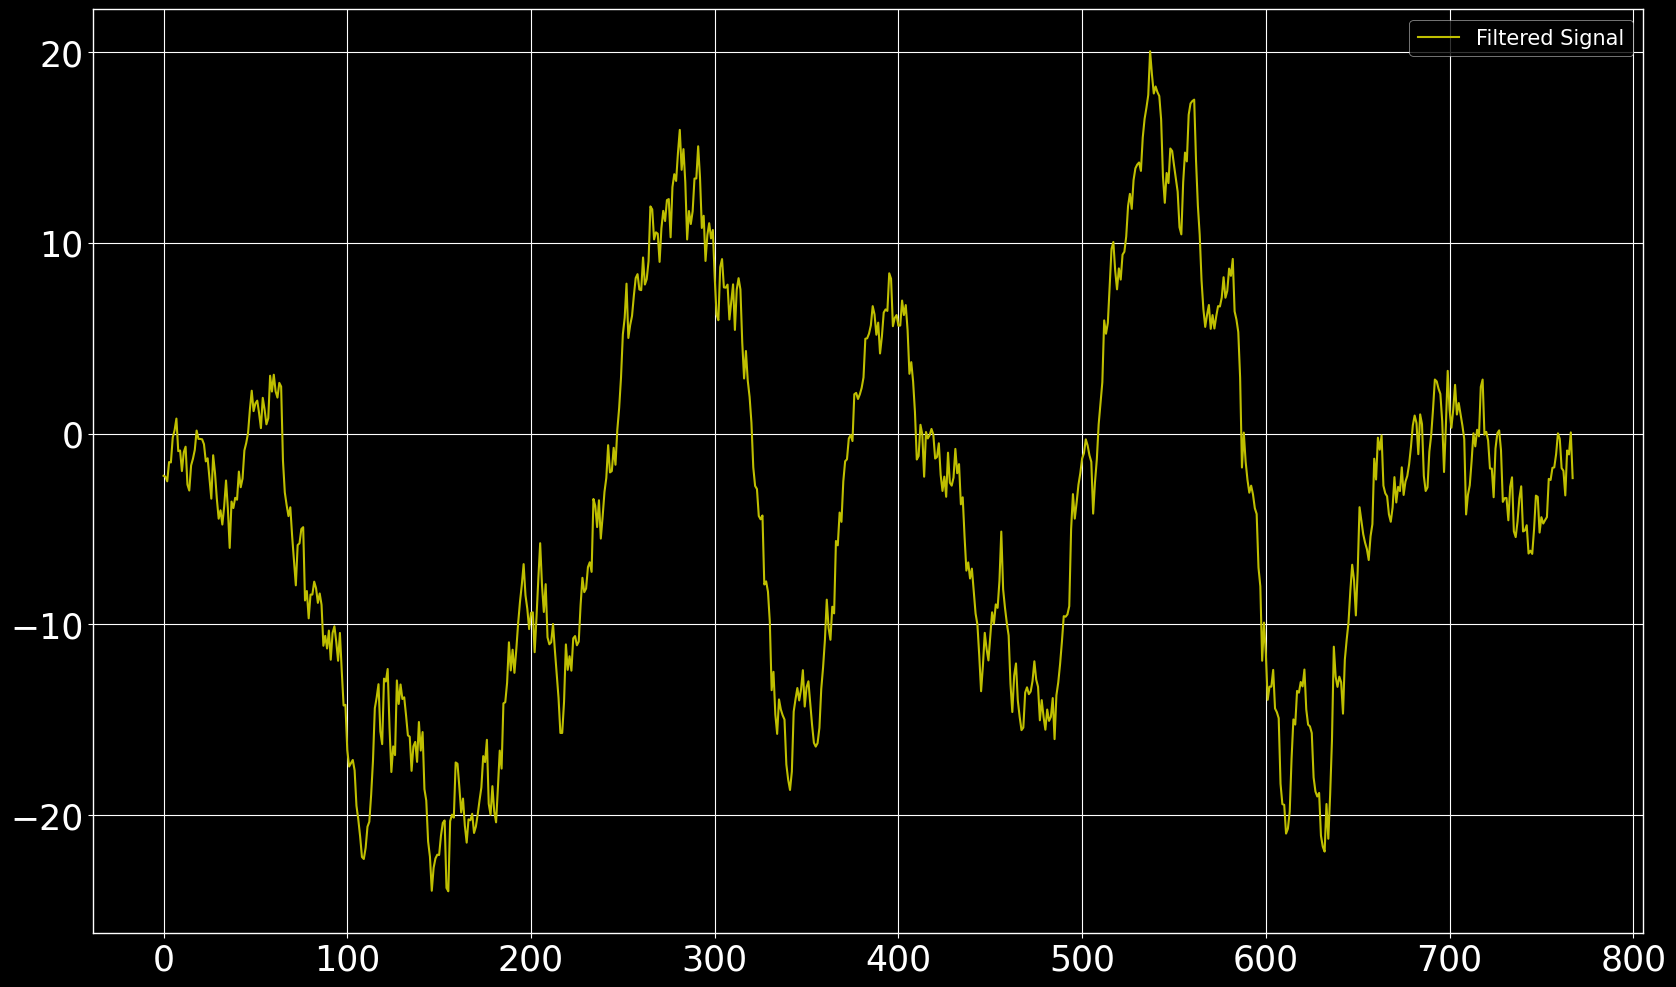

In [81]:
# filtering by convolution

filteredSignal = np.convolve(Noisysignal, filter, mode='same')

# plotting the filtered signal

plt.figure(figsize=(20,12))
plt.plot(filteredSignal, label = 'Filtered Signal', color = 'y')
plt.legend(fontsize = 15)

plt.show()

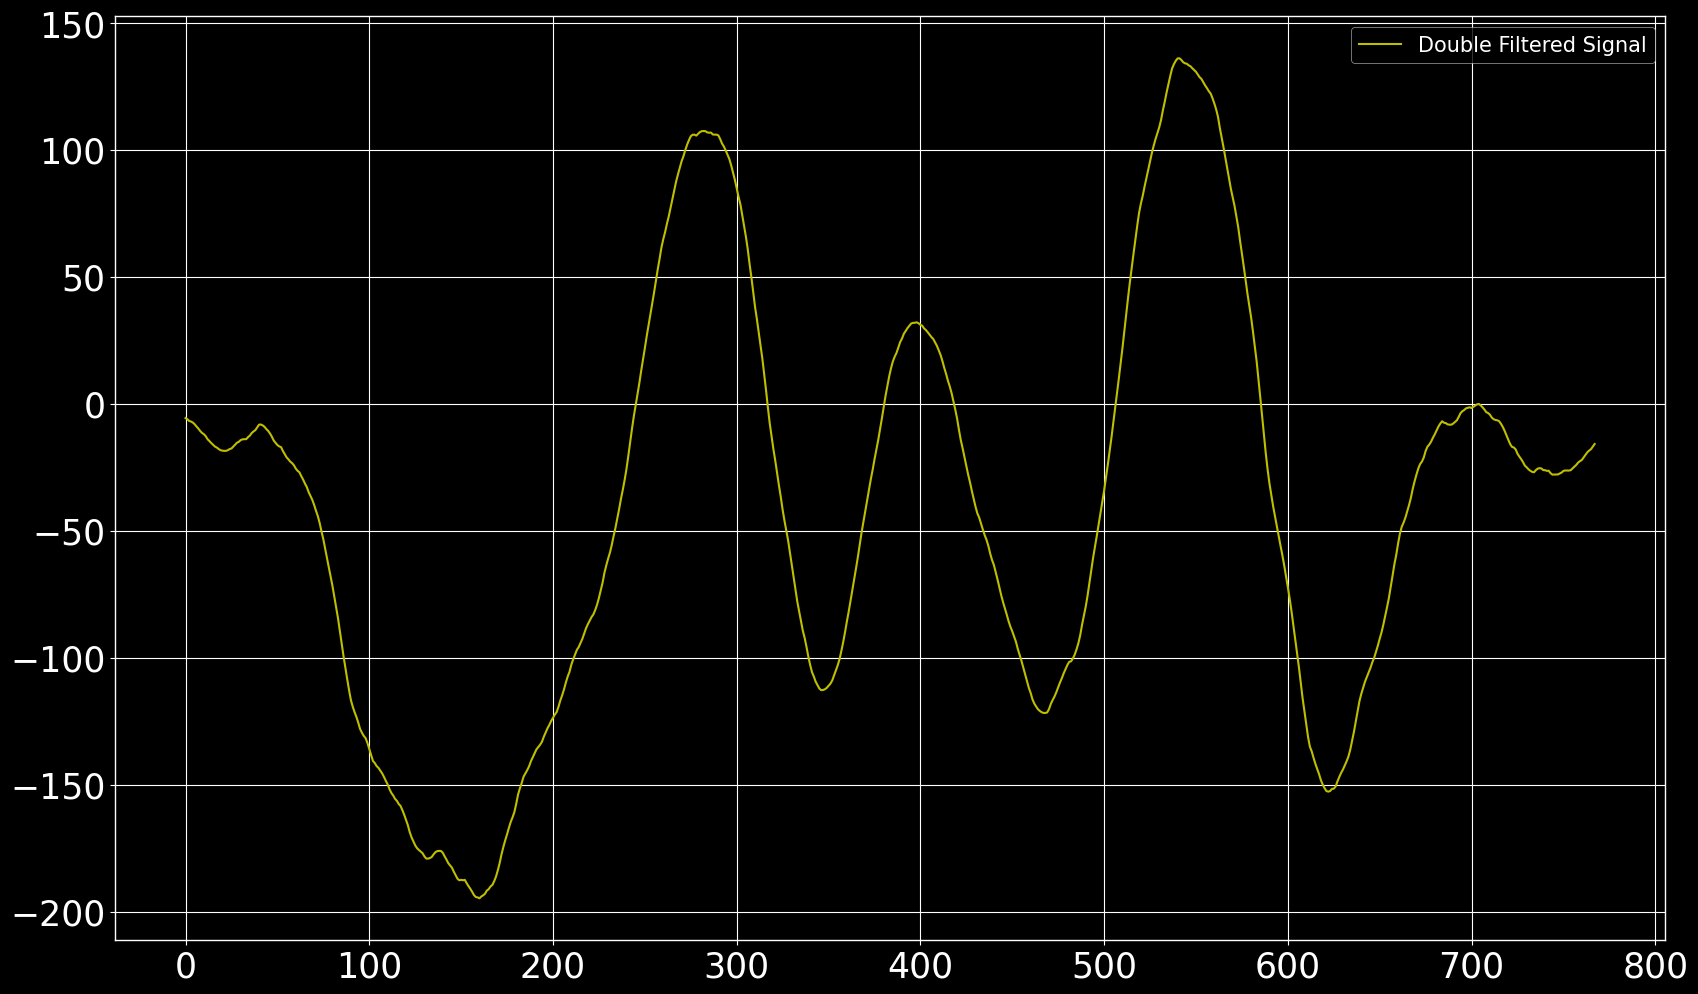

In [82]:
# filtering again the filtered signal

again_filteredSignal = np.convolve(filteredSignal, filter, mode='same')

# plotting the filtered signal

plt.figure(figsize=(20,12))
plt.plot(again_filteredSignal, label = 'Double Filtered Signal', color = 'y')
plt.legend(fontsize = 15)

plt.show()

### plotting noisy and denoising signal on same plot

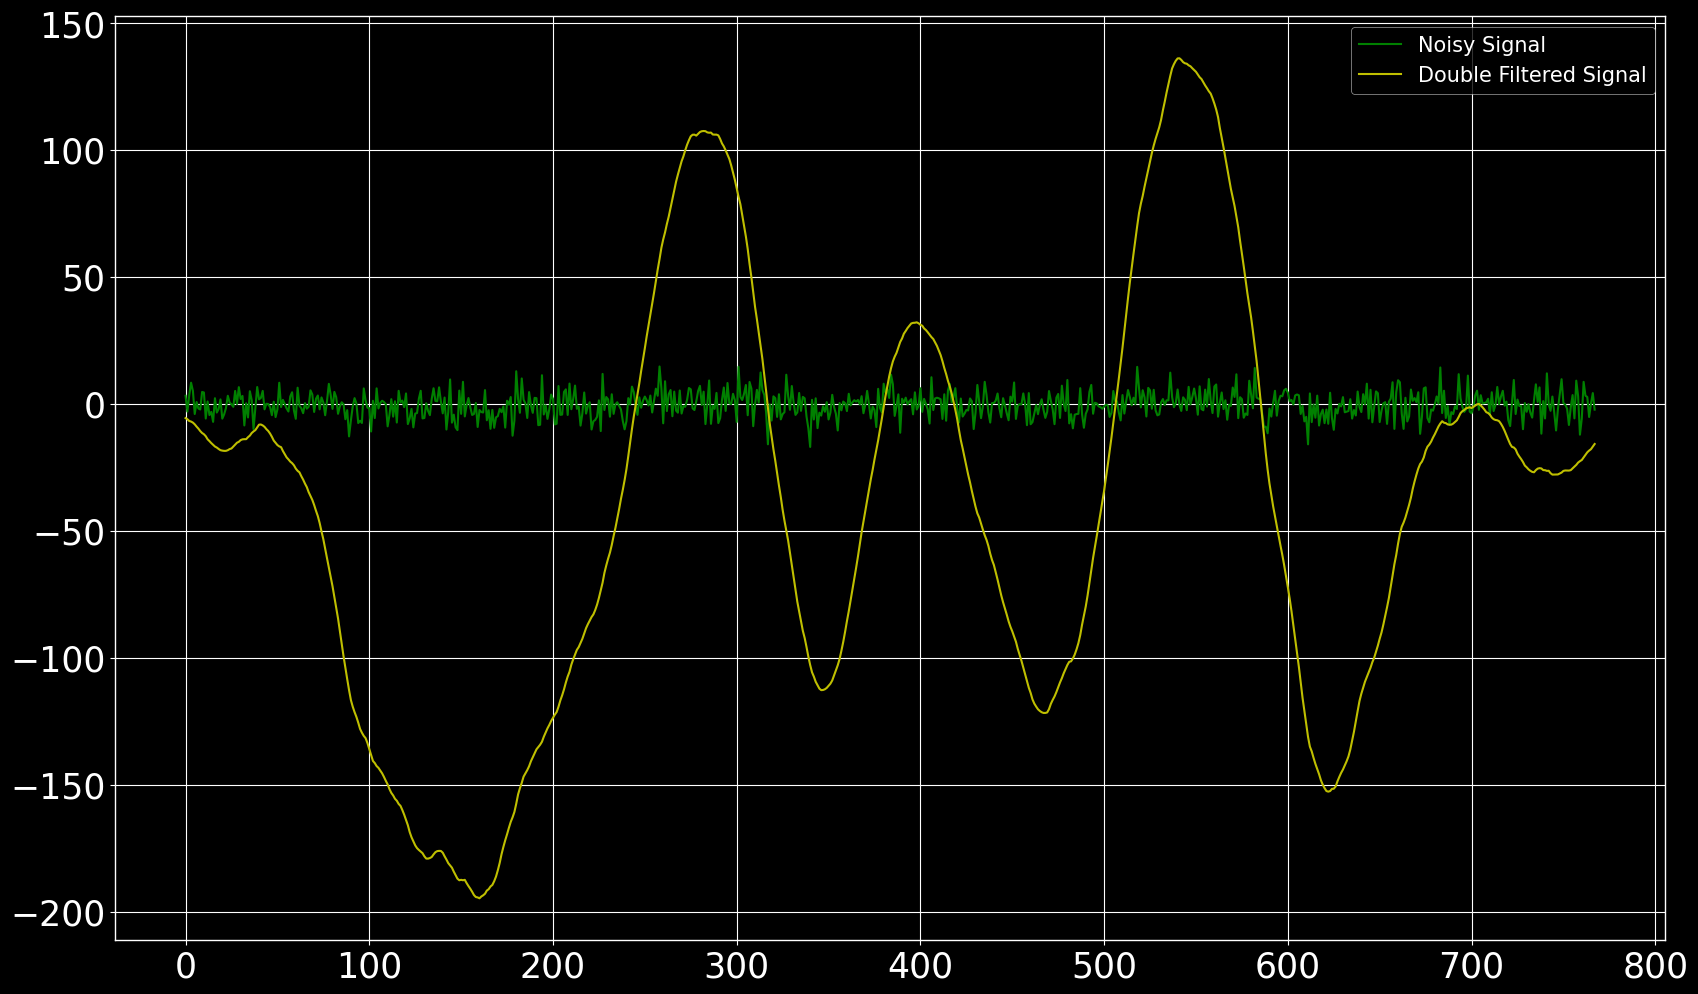

In [83]:
# ploting both the original noisy and double filtered signal

plt.figure(figsize=(20,12))
plt.plot(Noisysignal, label = 'Noisy Signal', color = 'g')

plt.plot(again_filteredSignal, label = 'Double Filtered Signal', color = 'y')
plt.legend(fontsize = 15)

plt.show()